In [7]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


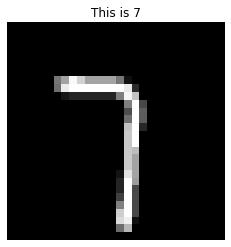

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 59999)
plt.title("This is " + str(y_train[c]))
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,118,164,248,209,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,111,235,254,254,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,23,36,36,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 圖片調整: (0~1) /255 -> tesorflow weights, reshape -> mlp只吃一維
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255

In [6]:
# 答案調整: One-hot Encoding: 10個機率
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Before:", y_train[0])
print("After:", y_train_cat[0])

Before: 5
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [17]:
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [18]:
# batch_size: 看了幾筆資料才做一次調整(梯度下降)(更新參數)
# 資料不大: 100~200  資料很大: 10~20
# epochs: 整份資料要翻幾遍, 控制擬合程度
# val_loss平滑就該停下來
# validation_split: 驗證模型好不好, 要用沒看過的資料
# verbose: 印出多少log(1:最詳細 2:必要的 0:無)
# 10(epochs) * 54000(訓練資料) / 200(筆調整一次) = 2700(調整)
mlp.fit(x_train_reshape, y_train_cat,
        batch_size=200, epochs=10,
        validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.3730 - acc: 0.8972 - val_loss: 0.1664 - val_acc: 0.9563
Epoch 2/10
 - 1s - loss: 0.1684 - acc: 0.9519 - val_loss: 0.1217 - val_acc: 0.9682
Epoch 3/10
 - 1s - loss: 0.1178 - acc: 0.9661 - val_loss: 0.0965 - val_acc: 0.9720
Epoch 4/10
 - 1s - loss: 0.0877 - acc: 0.9746 - val_loss: 0.0895 - val_acc: 0.9758
Epoch 5/10
 - 1s - loss: 0.0704 - acc: 0.9800 - val_loss: 0.0812 - val_acc: 0.9758
Epoch 6/10
 - 1s - loss: 0.0561 - acc: 0.9841 - val_loss: 0.0830 - val_acc: 0.9767
Epoch 7/10
 - 1s - loss: 0.0467 - acc: 0.9868 - val_loss: 0.0776 - val_acc: 0.9788
Epoch 8/10
 - 1s - loss: 0.0371 - acc: 0.9900 - val_loss: 0.0687 - val_acc: 0.9805
Epoch 9/10
 - 1s - loss: 0.0308 - acc: 0.9919 - val_loss: 0.0688 - val_acc: 0.9805
Epoch 10/10
 - 1s - loss: 0.0246 - acc: 0.9941 - val_loss: 0.0693 - val_acc: 0.9803


In [19]:
mlp.evaluate(x_test_reshape, y_test_cat)

10000/10000 [==============================] - 0s 19us/step


[0.069609477427206, 0.9787]